In [1]:
import random

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
num_games = 1000
ot_shots = 10

##########################
# Team 1 - Stronger Team #
##########################
team1 = {
    '2pt rate': .50,
    '3pt rate': .50,
    '2pt%': .55,
    '3pt%': .38,
    'orbd': .275
}


#############################
# Team 2 - Out Matched Team #
############################
team2 = {
    '2pt rate': .50,
    '3pt rate': .50,
    '2pt%': .50,
    '3pt%': .33,
    'orbd': .225
}

In [3]:
def points(team):
    roll_shot_type = random.random()
    roll_make = random.random()

    if roll_shot_type <= team['2pt rate']:
        if roll_make <= team['2pt%']:
            return 2
    else:
        if roll_make <= team['3pt%']:
            return 3

    roll_orbd = random.random()

    if roll_orbd < team['orbd']:
        return points(team)

    return 0


def play_game(shots_to_take):
    t1_points_in_game = 0
    t2_points_in_game = 0
    for shot in range(shots_to_take):
        t1_points_in_game += points(team1)
        t2_points_in_game += points(team2)
    return t1_points_in_game, t2_points_in_game

In [4]:
results = []
for rate3 in [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]:
    team2['3pt rate'] = rate3
    team2['2pt rate'] = 1 - rate3
    for shots in range(60, 121):
        for game in range(num_games):
            t1_points, t2_points = play_game(shots)

            while t1_points == t2_points:
                t1_new, t2_new = play_game(ot_shots)
                t1_points += t1_new
                t2_points += t2_new

            result = {
                'shots': shots,
                '3rate': rate3,
                'team1': t1_points,
                'team2': t2_points,
                'game': game,
                'team2_win': t2_points > t1_points,
            }
            results.append(result)

frame = pd.DataFrame(results)
wins = frame.groupby(by=['shots', '3rate'])['team2_win'].sum().reset_index()
wins['win%'] = wins['team2_win']/num_games

/var/folders/vc/57rv48yn701dfc_3bmv9xqwm0000gn/T/ipykernel_48499/2431320315.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) #<-- Note the difference from your original code...


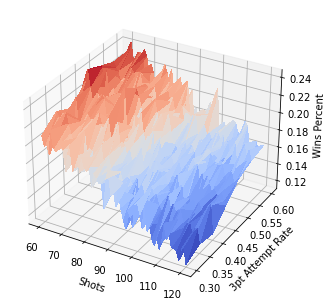

In [5]:
fig = plt.figure()
ax = Axes3D(fig) 
# Data for three-dimensional scattered points

zdata = wins['win%']
xdata = wins['shots']
ydata = wins['3rate']
ax.plot_trisurf(xdata, ydata, zdata, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('Shots')
ax.set_ylabel('3pt Attempt Rate')
ax.set_zlabel('Wins Percent')

plt.show()